In [40]:
from __future__ import print_function, division

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [42]:
df = pd.read_csv('cleaned.csv')

In [43]:
df.head()

,Unnamed: 0,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
0,0,6,$995.00,4.0,180,281,378,2,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6,"$2,900.00",4.0,180,281,378,2,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,$500.00,4.0,180,281,378,2,2.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6,$900.00,4.0,180,281,378,2,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6,"$2,000.00",4.0,180,281,378,2,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [45]:
df['Price'][9]

'$3,700.00'

In [46]:
new_price = df[df.columns[1]].replace('[\$,]', '', regex=True).astype(float)

In [47]:
df['Price'] = new_price

In [48]:
df.head()

,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
0,6,995.0,4.0,180,281,378,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,2900.0,4.0,180,281,378,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,500.0,4.0,180,281,378,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,900.0,4.0,180,281,378,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,2000.0,4.0,180,281,378,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.isnull().head()

,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isnull().any(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [51]:
df[df.isnull().any(axis=1)]

,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"


In [52]:
df = df.dropna()

In [53]:
df.Reviews.unique()

array(['180', '5472', '282', '309', '813', '83', '1,848', '240', '1,482',
       '1,360', 'Review', '2,136', '777', '101', '379', '642', '1,481',
       '333', '483', '153', '74', '322', '1,129', '81', '1,610', '325',
       '249', '783', '3,204', '1,966', '1,081', '189', '144', '245', '428',
       '254', '147', '63', '771', '137', '842', '1,118', '257', '730',
       '532', '756', '541', '106', '304', '835', '531', '2,020', '4,522',
       '696', '781', '511'], dtype=object)

In [54]:
#Remove rows that say "Review" as the number of reviews
to_del = df['Reviews'] == 'Review'

In [55]:
df[to_del]

,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
297,4,13500.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
298,4,3000.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
299,4,5000.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
300,4,7200.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
301,4,17400.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
302,4,3400.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
303,4,10000.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
304,4,13000.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
305,4,10500.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
306,4,17000.0,4.0,Review,307,727,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df = df[df.Reviews != 'Review']

In [58]:
wrong_cols = ['MaxOcc', 'Price', 'PriceMax', 'Bdrs', 'Baths']

In [59]:
df.Bdrs.unique()

array(['2', '1', '3', 'St', '4'], dtype=object)

In [60]:
#St needs to be converted to 0.5 Rooms
to_del2 = df['Bdrs'] == 'St'

In [61]:
print(to_del2)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4429    False
4430    False
4431    False
4432    False
4433    False
4434    False
4435    False
4436    False
4437    False
4438    False
4439    False
4440    False
4441    False
4442    False
4443    False
4444    False
4445    False
4446    False
4447    False
4448    False
4449    False
4450    False
4451    False
4452    False
4453    False
4454    False
4455    False
4456    False
4457    False
4458    False
Name: Bdrs, Length: 4445, dtype: bool


In [62]:
df = df.replace('St', '0.5')

In [63]:
df.Bdrs.unique()

array(['2', '1', '3', '0.5', '4'], dtype=object)

In [64]:
for col in wrong_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [65]:
df.dropna()

,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
0,6,995.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,2900.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,500.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,900.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,2000.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1000.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,1000.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,450.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6,1750.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,3700.0,4.0,180,281,378,2.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
print(df.dtypes)

MaxOcc                           int64
Price                          float64
Rating                         float64
Reviews                         object
PriceMin                         int64
PriceMax                         int64
Bdrs                           float64
Baths                          float64
Hanalei, Kauai  Hawaii           int64
Honolulu, Oahu  Hawaii           int64
Kahana, Maui  Hawaii             int64
Kailua-Kona, Hawaii  Hawaii      int64
Kaluakoi, Molokai  Hawaii        int64
Kapaa, Kauai  Hawaii             int64
Kapolei, Oahu  Hawaii            int64
Kauai  Hawaii                    int64
Kaupalua, Maui  Hawaii           int64
Kihei, Maui  Hawaii              int64
Ko Olina, Oahu  Hawaii           int64
Koloa, Kauai  Hawaii             int64
Lahaina, Maui  Hawaii            int64
Lihue, Kauai  Hawaii             int64
Makaha, Oahu  Hawaii             int64
Maui  Hawaii                     int64
Princeville, Kauai  Hawaii       int64
Waikoloa  Hawaii         

In [69]:
df.Reviews.unique()

array(['180', '5472', '282', '309', '813', '83', '1,848', '240', '1,482',
       '1,360', '2,136', '777', '101', '379', '642', '1,481', '333', '483',
       '153', '74', '322', '1,129', '81', '1,610', '325', '249', '783',
       '3,204', '1,966', '1,081', '189', '144', '245', '428', '254', '147',
       '63', '771', '137', '842', '1,118', '257', '730', '532', '756',
       '541', '106', '304', '835', '531', '2,020', '4,522', '696', '781',
       '511'], dtype=object)

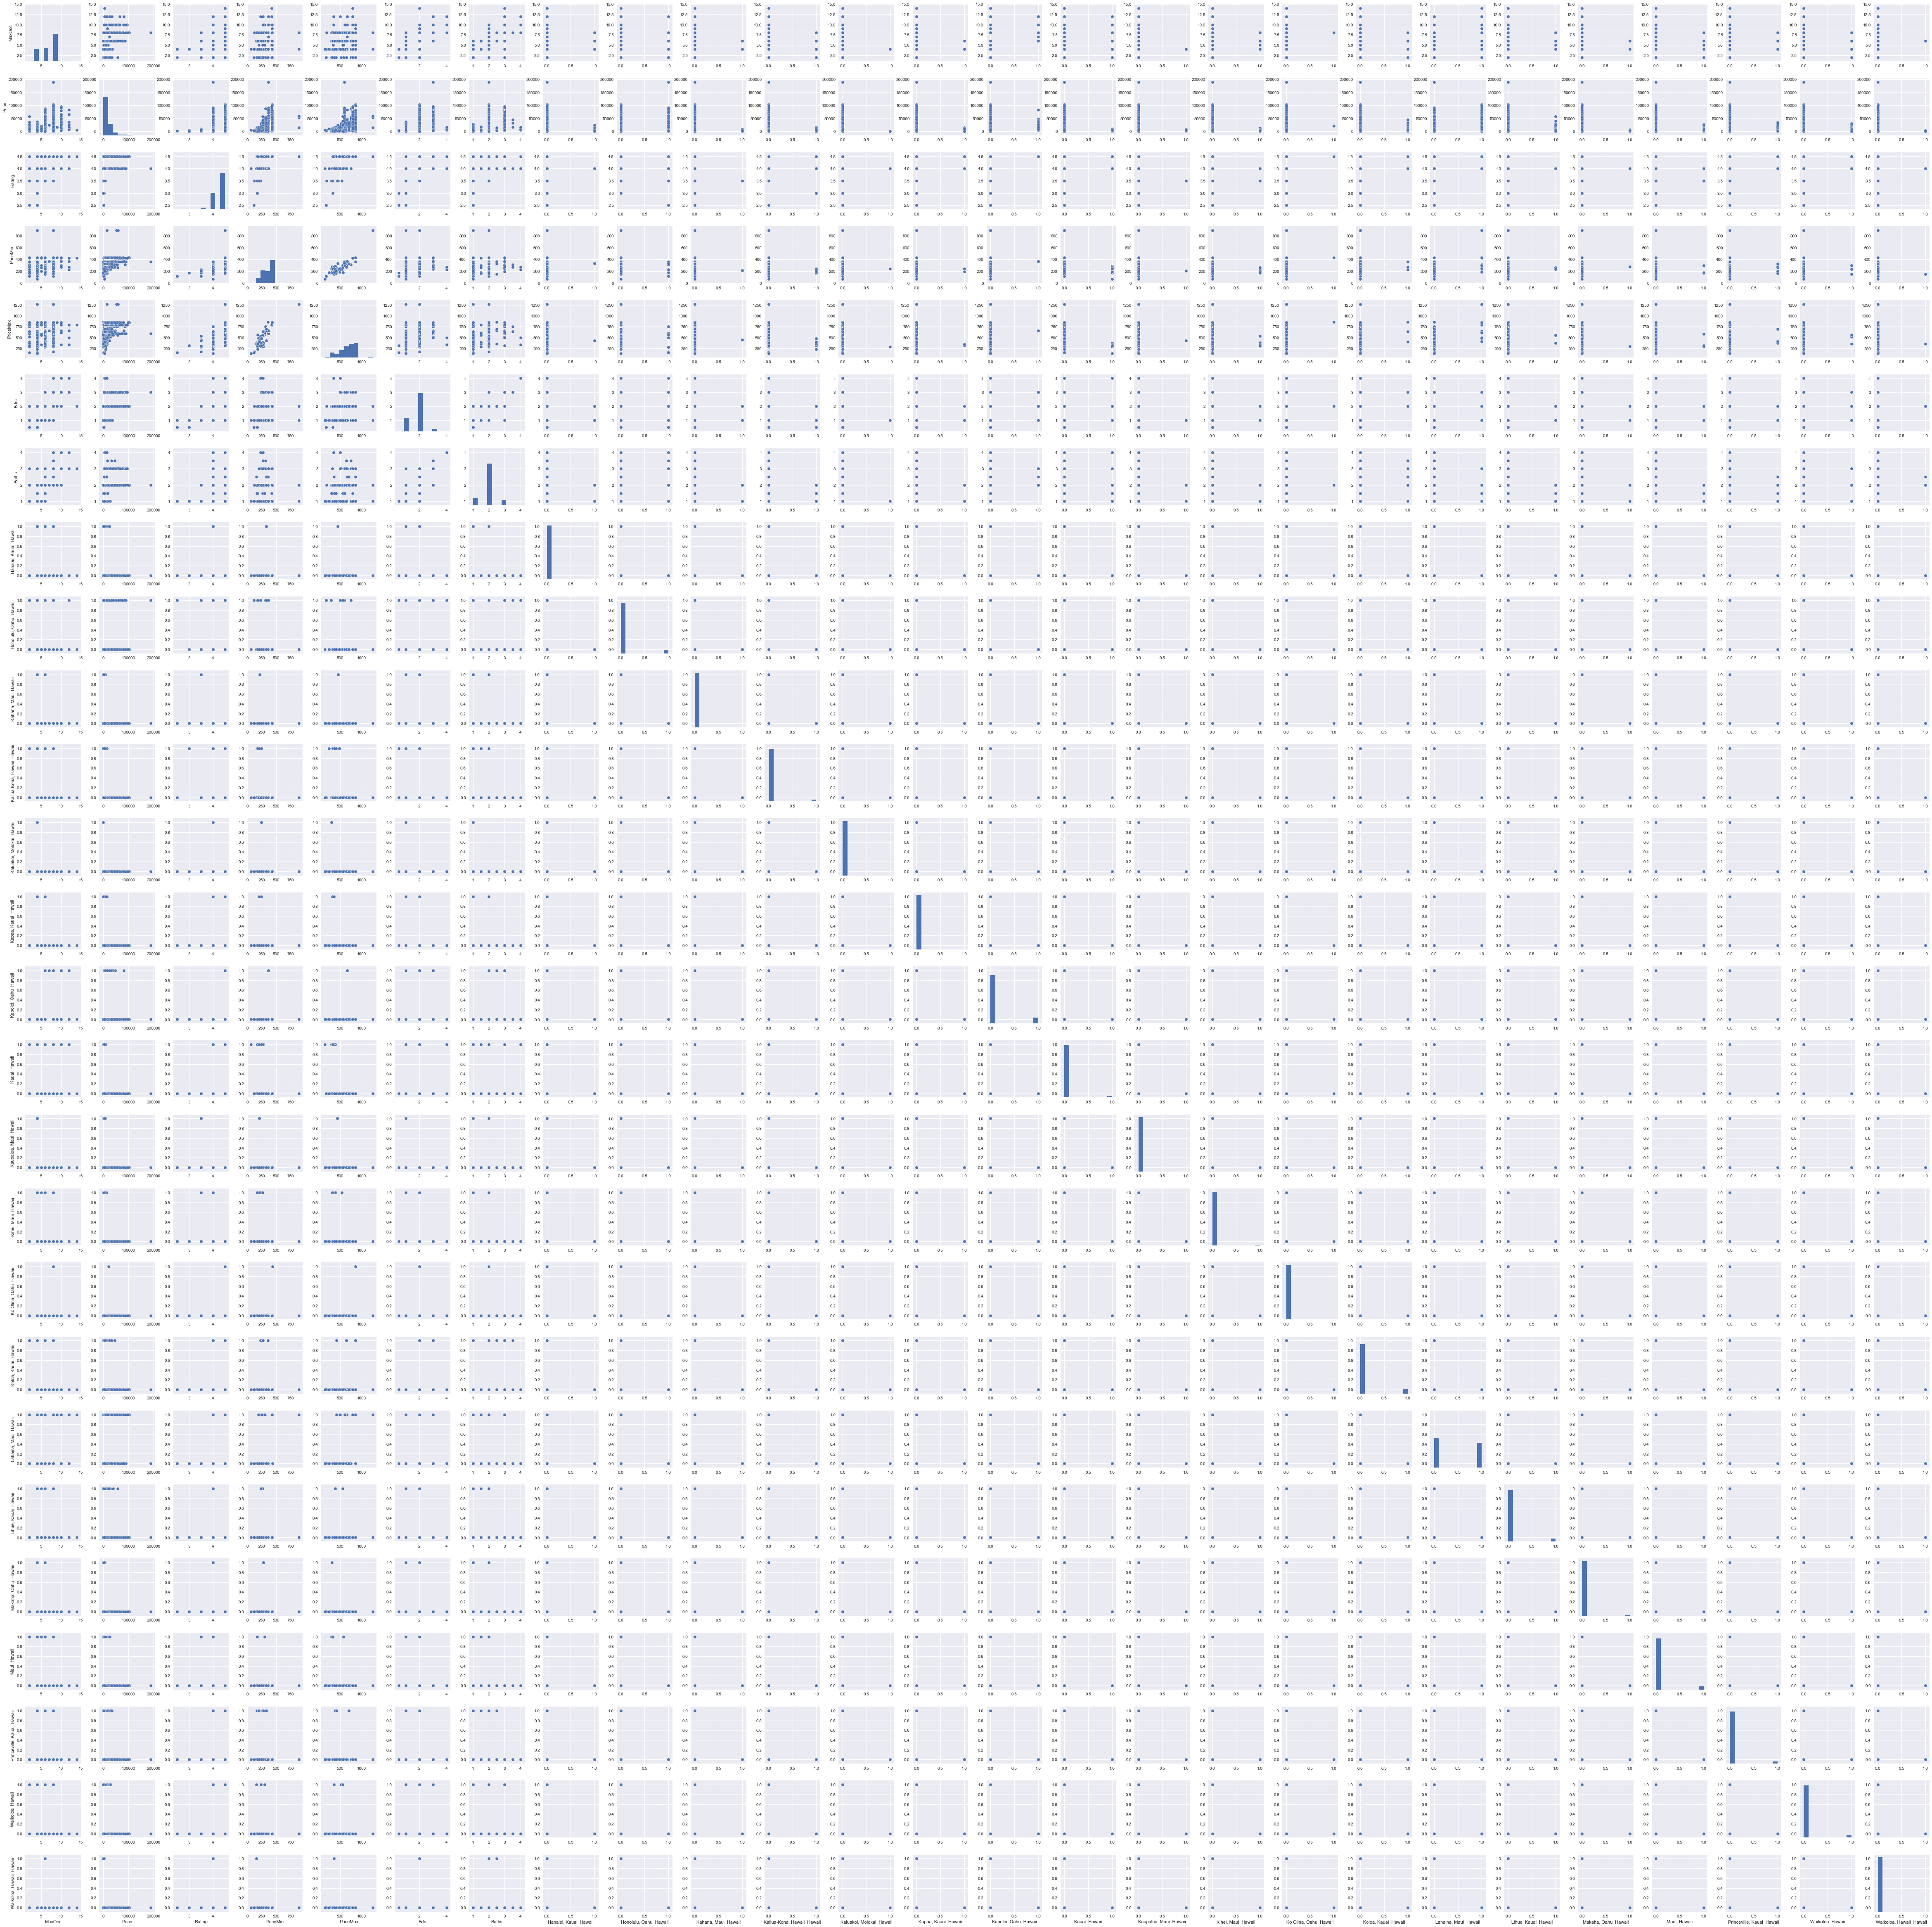

In [70]:
sns.pairplot(df)

Create a new dataframe without the dummy variables

In [71]:
df1 = df.copy(deep=True)

In [72]:
df1 = df1[['MaxOcc', 'Price', 'Rating', 'PriceMin', 'PriceMax', 'Bdrs', 'Baths']]

In [73]:
print(df1.dtypes)

MaxOcc        int64
Price       float64
Rating      float64
PriceMin      int64
PriceMax      int64
Bdrs        float64
Baths       float64
dtype: object


In [74]:
df1.isnull()

,MaxOcc,Price,Rating,PriceMin,PriceMax,Bdrs,Baths
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [75]:
df1.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4429    False
4430    False
4431    False
4432    False
4433    False
4434    False
4435    False
4436    False
4437    False
4438    False
4439    False
4440    False
4441    False
4442    False
4443    False
4444    False
4445    False
4446    False
4447    False
4448    False
4449    False
4450    False
4451    False
4452    False
4453    False
4454    False
4455    False
4456    False
4457    False
4458    False
Length: 4445, dtype: bool

In [76]:
df1[df1.isnull().any(axis=1)]

,MaxOcc,Price,Rating,PriceMin,PriceMax,Bdrs,Baths


In [77]:
df1 = df1.dropna()

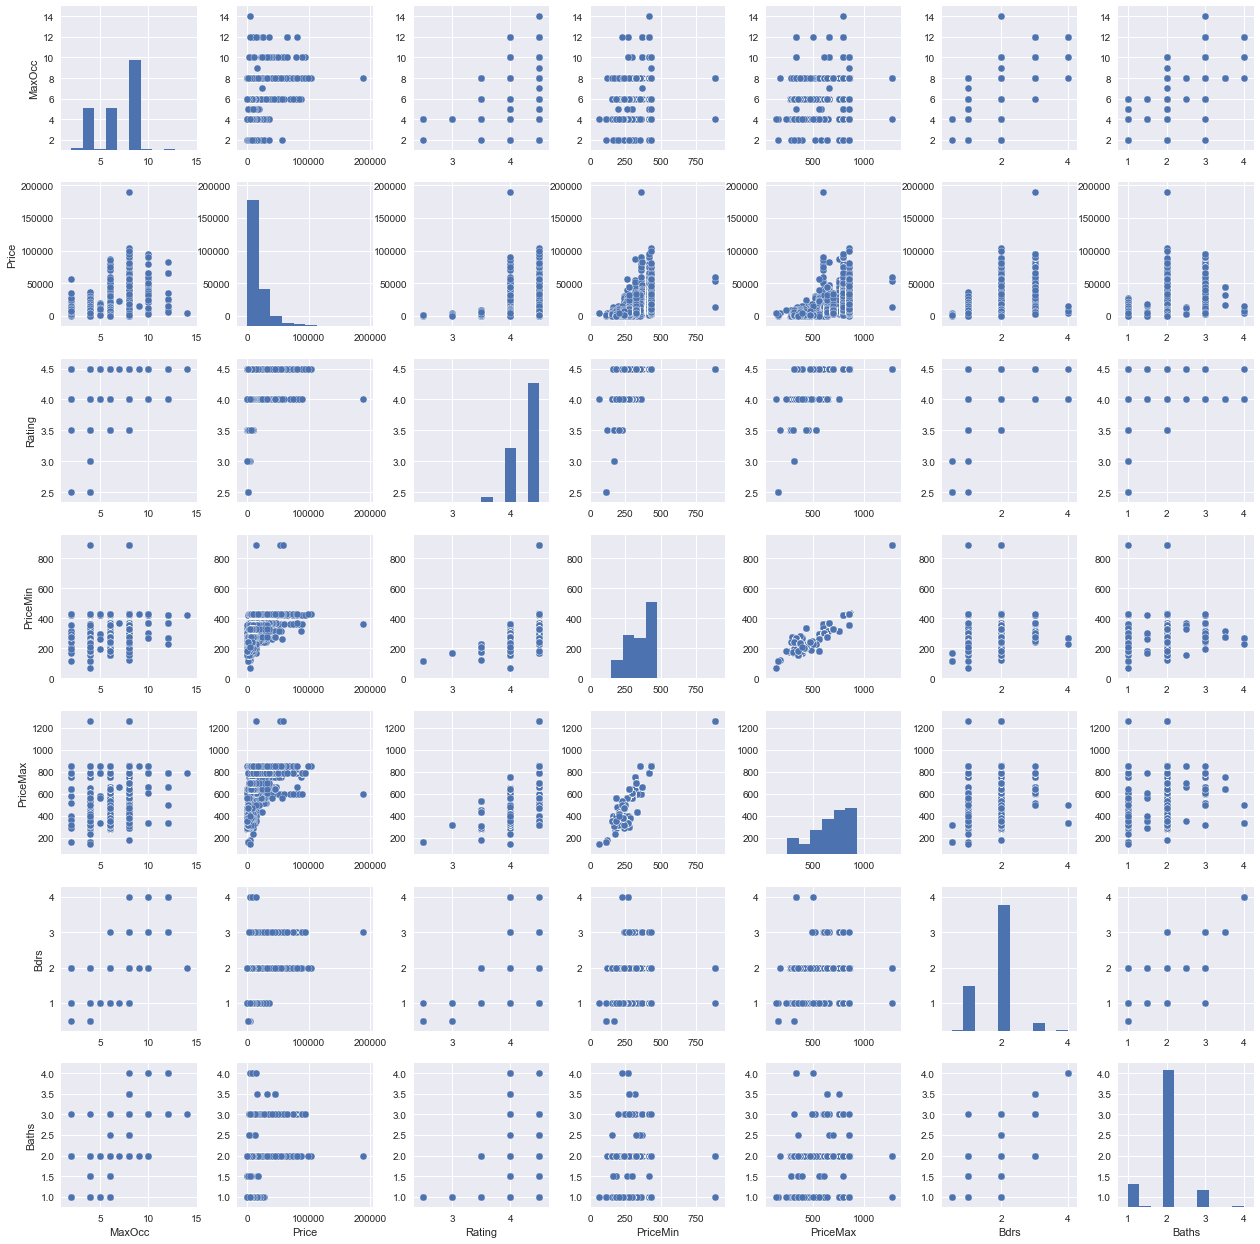

In [78]:
sns.pairplot(df1)

df1 is the data set without dummies

In [79]:
df.to_csv('dummy_data.csv')

In [80]:
df.corr()

,MaxOcc,Price,Rating,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii","Kahana, Maui Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
MaxOcc,1.000000,0.422151,0.435247,0.424203,0.403618,0.784448,0.591057,-0.062380,-0.152085,-0.033260,...,-0.058529,0.012082,0.020935,0.242594,-0.197935,-0.049236,-0.236395,0.017524,-0.044593,-0.008249
Price,0.422151,1.000000,0.319705,0.452394,0.424535,0.499520,0.423544,-0.052469,0.037848,-0.028290,...,-0.074761,0.004353,-0.088656,0.374286,-0.114661,-0.035754,-0.141111,-0.118656,-0.080997,-0.025127
Rating,0.435247,0.319705,1.000000,0.717526,0.664261,0.262114,0.287607,-0.115939,-0.412047,-0.099048,...,-0.180264,0.009881,-0.099392,0.510682,-0.276291,-0.048680,-0.345844,-0.008920,0.074948,-0.029793
PriceMin,0.424203,0.452394,0.717526,1.000000,0.913857,0.218914,0.278316,-0.018911,-0.191196,-0.052865,...,-0.134237,0.015046,-0.131241,0.763703,-0.250894,-0.035682,-0.203277,-0.196861,-0.226490,-0.058221
PriceMax,0.403618,0.424535,0.664261,0.913857,1.000000,0.234225,0.242398,-0.144749,-0.087189,-0.044905,...,-0.164118,0.015482,0.103183,0.691263,-0.213283,-0.094407,-0.218250,-0.171242,-0.206908,-0.049759
Bdrs,0.784448,0.499520,0.262114,0.218914,0.234225,1.000000,0.682587,-0.043401,-0.064972,-0.026094,...,-0.022521,0.005976,0.136178,0.111384,-0.209857,-0.045502,-0.249139,0.041063,0.060207,0.010353
Baths,0.591057,0.423544,0.287607,0.278316,0.242398,0.682587,1.000000,-0.036094,-0.106200,-0.039705,...,-0.055402,0.000844,0.034691,0.266073,-0.028274,-0.063397,-0.336166,-0.024861,-0.006497,0.010408
"Hanalei, Kauai Hawaii",-0.062380,-0.052469,-0.115939,-0.018911,-0.144749,-0.043401,-0.036094,1.000000,-0.026371,-0.003394,...,-0.010112,-0.001517,-0.031407,-0.092551,-0.024372,-0.004294,-0.025155,-0.020290,-0.021370,-0.002628
"Honolulu, Oahu Hawaii",-0.152085,0.037848,-0.412047,-0.191196,-0.087189,-0.064972,-0.106200,-0.026371,1.000000,-0.008751,...,-0.026073,-0.003912,-0.080982,-0.238640,-0.062844,-0.011072,-0.064862,-0.052317,-0.055102,-0.006777
"Kahana, Maui Hawaii",-0.033260,-0.028290,-0.099048,-0.052865,-0.044905,-0.026094,-0.039705,-0.003394,-0.008751,1.000000,...,-0.003355,-0.000503,-0.010422,-0.030711,-0.008087,-0.001425,-0.008347,-0.006733,-0.007091,-0.000872
